1. caricare i dati in un dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv')

2. visualizzare i dati

In [ ]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. eliminare dal dataframe tutti i record con valori NaN

In [ ]:
df.dropna(inplace= True)
df    

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,Japanese,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


4. calcolare il numero di show per ogni lingua. Ordinare in ordine decrescente sul numero

In [ ]:
df2 = df.groupby('Language')['IMDb rating'].count().sort_values(ascending=True)
df2

Language
Deutsch       1
Spanish       1
Suomi         1
Japanese      7
Hindi        17
English     155
Name: IMDb rating, dtype: int64

5. visualizzare il grafico a barre verticali dei dati precedenti

Text(0.5, 0.98, 'Numero di film per ogni lingua')

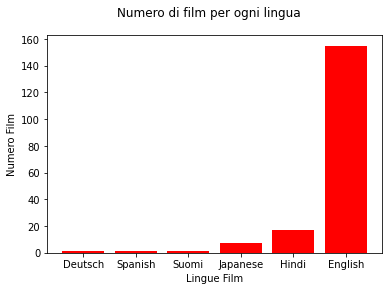

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.bar(df2.index, df2.values, color='r')

ax.set_xlabel('Lingue Film')
ax.set_ylabel('Numero Film')
fig.suptitle('Numero di film per ogni lingua')

6. visualizzare le stesse informazioni dell'esercizio precedente utilizzando un grafico a torta

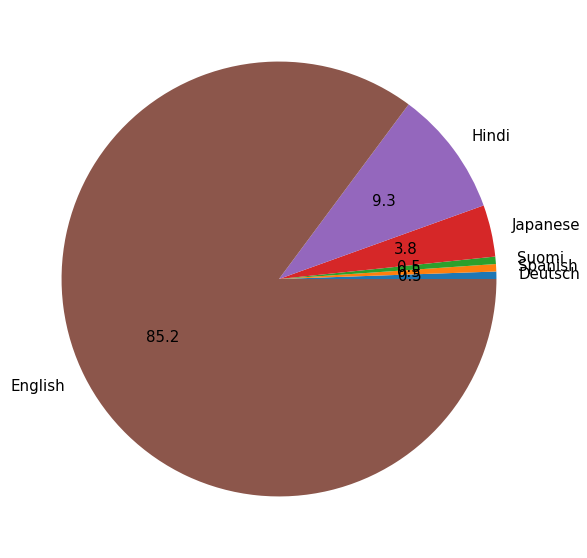

In [ ]:
slices = list(df2.index)
activities = list(df2.values)
plt.rcParams.update({'font.size':15})
fig = plt.figure(figsize=[10,10])
ax = plt.axes()

#CREAZIONE GRAFICO A TORTA
ax.pie(activities,labels=slices,autopct='%.1f')
plt.show()

7. creare un nuovo dataframe che nella colonna 'Language' contenga solo 'English' o 'non English'

In [ ]:
df3 = df
df['Language'][df['Language'] != 'English'] = 'non English'
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,non English,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,non English,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,non English,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,non English,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


8. visualizzare un grafico a barre con gli anni sulle ascisse e il numero di show in inglese e non in inglese sulle ordinate. Considerare solo gli ultimi 10 anni (vedi grafico allegato come esempio)

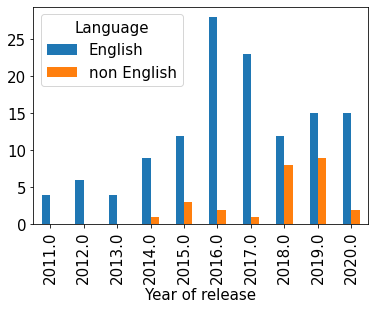

In [ ]:
from datetime import datetime

df3[df3['Year of release']>= datetime.now().year -10].groupby(['Language'])['Year of release'].value_counts().unstack(0).plot.bar()